# Освой самостоятельно SQL
## за 10 минут

# УР0К1
# Основы SQL

### Базы данных
Термин база данных используется в самых разных областях, но 
мы (применительно к SQL) будем считать базу данных набором сведений, хранящихся неким упорядоченным способом.\

Процесс написания инструкций требует хорошего понимания структуры базы данных. Без знания того, какая информация в 
какой таблице хранится, как таблицы связаны одна с другой и как распределены данные в строках, невозможно написать эффективный 
SQL-код.


In [1]:
import sqlite3

#Таблица sqlite_master - это главная таблица (master table), 
# в которой отслеживаются таблицы и виды, содержащиеся в базе данных.

query = """SELECT name FROM sqlite_master WHERE type='table';"""
con = sqlite3.connect('tysql/tysql.sqlite')
cursor = con.execute(query)
cursor.description

(('name', None, None, None, None, None, None),)

In [2]:
rows = cursor.fetchall()
rows

[('Customers',), ('OrderItems',), ('Orders',), ('Products',), ('Vendors',)]

Мы видим, что в нашем распоряжении есть таблицы [('Customers',), ('OrderItems',), ('Orders',), ('Products',), ('Vendors',)]

# УРОК 2
# Извлечение данных из таблиц

с помощью инструкции SELECT можно запросить все столбцы, не перечисляя каждый из них. Для этого вместо имен столбцов указывается групповой символ “звездочка” (*)

In [3]:
import sqlalchemy as sqla
import pandas as pd
db = sqla.create_engine('sqlite:///tysql/tysql.sqlite')
pd.read_sql('select * from OrderItems', db)

,order_num,order_item,prod_id,quantity,item_price
0,20005,1,BR01,100,5.49
1,20005,2,BR03,100,10.99
2,20006,1,BR01,20,5.99
3,20006,2,BR02,10,8.99
4,20006,3,BR03,10,11.99
5,20007,1,BR03,50,11.49
6,20007,2,BNBG01,100,2.99
7,20007,3,BNBG02,100,2.99
8,20007,4,BNBG03,100,2.99
9,20007,5,RGAN01,50,4.49


In [4]:
pd.read_sql('SELECT * FROM sqlite_master WHERE type="table";', db)

,type,name,tbl_name,rootpage,sql
0,table,Customers,Customers,2,CREATE TABLE Customers\n(\n cust_id char...
1,table,OrderItems,OrderItems,4,CREATE TABLE OrderItems\n(\n order_num int ...
2,table,Orders,Orders,7,CREATE TABLE Orders\n(\n order_num int ...
3,table,Products,Products,10,CREATE TABLE Products\n(\n prod_id char(10...
4,table,Vendors,Vendors,12,CREATE TABLE Vendors\n(\n vend_id char(1...


Как же получить список уникальных значений?
Решение заключается в применении ключевого слова DISTINCT, 
которое заставляет СУБД вернуть только уникальные значения.

In [5]:
pd.read_sql('SELECT DISTINCT * \
            FROM Products \
            ORDER BY prod_name \
            LIMIT 2,5;', db)

,prod_id,vend_id,prod_name,prod_price,prod_desc
0,BR01,BRS01,8 inch teddy bear,5.99,"8 inch teddy bear, comes with cap and jacket"
1,BNBG02,DLL01,Bird bean bag toy,3.49,"Bird bean bag toy, eggs are not included"
2,BNBG01,DLL01,Fish bean bag toy,3.49,"Fish bean bag toy, complete with bean bag worm..."
3,RYL01,FNG01,King doll,9.49,12 inch king doll with royal garments and crown
4,RYL02,FNG01,Queen doll,9.49,12 inch queen doll with royal garments and crown


Для извлечения нескольких столбцов из таблицы применяется 
та же самая инструкция SELECT. Отличие состоит в том, что после 
ключевого слова SELECT необходимо через запятую указать несколько имен столбцов

In [6]:
pd.read_sql('SELECT prod_id, prod_price, prod_name \
            FROM Products \
            ORDER BY prod_price, prod_name;', db)

,prod_id,prod_price,prod_name
0,BNBG02,3.49,Bird bean bag toy
1,BNBG01,3.49,Fish bean bag toy
2,BNBG03,3.49,Rabbit bean bag toy
3,RGAN01,4.99,Raggedy Ann
4,BR01,5.99,8 inch teddy bear
5,BR02,8.99,12 inch teddy bear
6,RYL01,9.49,King doll
7,RYL02,9.49,Queen doll
8,BR03,11.99,18 inch teddy bear


# УРОКЗ
# Сортировка полученных данных
На этом уроке вы узнаете, как использовать предложение ORDER BY
инструкции SELECT для сортировки результатов запроса.

Для сортировки извлекаемых инструкцией SELECT данных предназначено предложение ORDER BY. В нем указывается имя одного 
или нескольких столбцов, по которым и сортируются результаты запроса.

In [7]:
pd.read_sql('SELECT prod_id, prod_price, prod_name FROM Products ORDER BY 2, 3;', db)

,prod_id,prod_price,prod_name
0,BNBG02,3.49,Bird bean bag toy
1,BNBG01,3.49,Fish bean bag toy
2,BNBG03,3.49,Rabbit bean bag toy
3,RGAN01,4.99,Raggedy Ann
4,BR01,5.99,8 inch teddy bear
5,BR02,8.99,12 inch teddy bear
6,RYL01,9.49,King doll
7,RYL02,9.49,Queen doll
8,BR03,11.99,18 inch teddy bear


Данные можно сортировать не только по возрастанию (от А до Я). 
Такой порядок задан по умолчанию, но в предложении ORDER BY 
можно также указывать порядок по убыванию (от Я до А). Для этого 
предназначено ключевое слово DESC.

In [8]:
pd.read_sql('SELECT prod_id, prod_price, prod_name FROM Products ORDER BY prod_price DESC;', db)

,prod_id,prod_price,prod_name
0,BR03,11.99,18 inch teddy bear
1,RYL01,9.49,King doll
2,RYL02,9.49,Queen doll
3,BR02,8.99,12 inch teddy bear
4,BR01,5.99,8 inch teddy bear
5,RGAN01,4.99,Raggedy Ann
6,BNBG01,3.49,Fish bean bag toy
7,BNBG02,3.49,Bird bean bag toy
8,BNBG03,3.49,Rabbit bean bag toy


Предложение LIMIT 5 OFFSET 5 заставляет СУБД вернуть 
пять строк, начиная со строки 5. Первое число — это количество 
строк для извлечения, а второе — начальная точка. 

СОВЕТ: краткая форма записи для MySQL, MariaDB и SQLite
MySQL, MariaDB и SQLite поддерживают краткую форму предложения l i m i t 3 o f f s e t 4, позволяя записать его как LIMIT 3,4. В данной форме число перед запятой задает количество 
строк, а после запятой — начальную точку.


In [9]:
pd.read_sql('SELECT prod_id, prod_price, prod_name \
            FROM Products WHERE prod_price =3.49 ORDER BY prod_name \
            LIMIT 1,4;', db)

,prod_id,prod_price,prod_name
0,BNBG01,3.49,Fish bean bag toy
1,BNBG03,3.49,Rabbit bean bag toy


# УРОК 4
# Фильтрация данных
На этом уроке вы узнаете, как использовать предложение WHERE
инструкции SELECT для задания условий фильтрации строк.

В инструкции SELECT данные фильтруются путем указания критерия отбора в предложении WHERE. 
Это предложение указывается сразу после названия таблицы (в предложении FROM) следующим 
образом.

In [10]:
pd.read_sql("SELECT prod_id, prod_price, prod_name \
            FROM Products WHERE vend_id <> 'DLL01';", db)

,prod_id,prod_price,prod_name
0,BR01,5.99,8 inch teddy bear
1,BR02,8.99,12 inch teddy bear
2,BR03,11.99,18 inch teddy bear
3,RYL01,9.49,King doll
4,RYL02,9.49,Queen doll


ПРЕДУПРЕЖДЕНИЕ: положение предложения w h e r e
При использовании обоих предложений, order by и where, убедитесь, что предложение order by следует за предложением where, иначе возникнет ошибка (см. урок 3)

In [11]:
# Для сравнения с диапазоном значений можно использовать оператор BETWEEN

pd.read_sql("SELECT prod_id, prod_price, prod_name \
            FROM Products WHERE prod_price BETWEEN 5 AND 10;", db)

,prod_id,prod_price,prod_name
0,BR01,5.99,8 inch teddy bear
1,BR02,8.99,12 inch teddy bear
2,RYL01,9.49,King doll
3,RYL02,9.49,Queen doll


Чтобы проверить, содержит ли столбец значение NULL, нельзя 
просто записать = NULL. Для предложения WHERE предусмотрено специальное выражение, которое используется для проверки значений 
NULL в столбцах: IS NULL.

In [12]:
pd.read_sql("SELECT * \
            FROM Customers WHERE cust_email IS NULL;", db)

,cust_id,cust_name,cust_address,cust_city,cust_state,cust_zip,cust_country,cust_contact,cust_email
0,1000000002,Kids Place,333 South Lake Drive,Columbus,OH,43333,USA,Michelle Green,None
1,1000000005,The Toy Store,4545 53rd Street,Chicago,IL,54545,USA,Kim Howard,None
2,1000000010,Toys Emporium,None,None,None,None,None,None,None


# УРОК 5
# Расширенная фильтрация данных
На этом уроке вы узнаете, как комбинировать предложения WHERE
для создания сложных условий отбора. Будет также продемонстрировано применение операторов NOT и IN.

In [13]:
# Чтобы отфильтровать данные по нескольким столбцам, 
# необходимо воспользоваться оператором AND для добавления 
# условий в предложение WHERE. Вот как это делается.

pd.read_sql("SELECT prod_id, prod_price, prod_name \
            FROM Products \
            WHERE vend_id = 'DLL01' AND prod_price <=4;", db)

,prod_id,prod_price,prod_name
0,BNBG01,3.49,Fish bean bag toy
1,BNBG02,3.49,Bird bean bag toy
2,BNBG03,3.49,Rabbit bean bag toy


Действие оператора OR противоположно действию оператора 
AND. Он заставляет СУБД извлекать только те строки, которые удовлетворяют хотя бы одному условию

In [14]:
pd.read_sql("SELECT prod_id, prod_price, prod_name \
            FROM Products \
            WHERE (vend_id = 'DLL01' OR vend_id = 'BRS01')\
            AND prod_price >= 10;", db)

,prod_id,prod_price,prod_name
0,BR03,11.99,18 inch teddy bear


In [15]:
# Оператор In служит для указания диапазона условий, 
# любое из которых может быть выполнено. 
# При этом значения, заключенные в скобки, 
# перечисляются через запятую. Рассмотрим следующий пример.
pd.read_sql("SELECT prod_id, prod_price, prod_name, vend_id \
            FROM Products \
            WHERE vend_id IN ('DLL01', 'BRS01')\
            AND prod_price >= 1 ORDER BY prod_name;", db)

,prod_id,prod_price,prod_name,vend_id
0,BR02,8.99,12 inch teddy bear,BRS01
1,BR03,11.99,18 inch teddy bear,BRS01
2,BR01,5.99,8 inch teddy bear,BRS01
3,BNBG02,3.49,Bird bean bag toy,DLL01
4,BNBG01,3.49,Fish bean bag toy,DLL01
5,BNBG03,3.49,Rabbit bean bag toy,DLL01
6,RGAN01,4.99,Raggedy Ann,DLL01


In [16]:
# В следующем примере демонстрируется применение логического оператора NOT. 
# Здесь извлекается список товаров, предлагаемых всеми поставщиками, кроме DLL01.
pd.read_sql("SELECT prod_id, prod_price, prod_name, vend_id \
            FROM Products \
            WHERE NOT vend_id ='DLL01'\
            ORDER BY prod_name;", db)


,prod_id,prod_price,prod_name,vend_id
0,BR02,8.99,12 inch teddy bear,BRS01
1,BR03,11.99,18 inch teddy bear,BRS01
2,BR01,5.99,8 inch teddy bear,BRS01
3,RYL01,9.49,King doll,FNG01
4,RYL02,9.49,Queen doll,FNG01


In [17]:
# Предыдущий запрос можно было бы записать при помощи оператора <>.
pd.read_sql("SELECT prod_id, prod_price, prod_name, vend_id \
            FROM Products \
            WHERE vend_id <> 'DLL01'\
            ORDER BY prod_name;", db)

,prod_id,prod_price,prod_name,vend_id
0,BR02,8.99,12 inch teddy bear,BRS01
1,BR03,11.99,18 inch teddy bear,BRS01
2,BR01,5.99,8 inch teddy bear,BRS01
3,RYL01,9.49,King doll,FNG01
4,RYL02,9.49,Queen doll,FNG01


# УРОН 6
# Фильтрация с использованием метасимволов
На этом уроке вы узнаете, что такое метасимволы, как их использовать и выполнять поиск с применением метасимволов и логического оператора LIKE для фильтрации извлекаемых данных

In [18]:
# В шаблоне поиска знак % означает найти 
# все вхождения любого символа. Например, 
# чтобы найти все товары, названия которых 
# начинаются со слова Fish, можно выполнить следующий запрос.

pd.read_sql("SELECT prod_id, prod_price, prod_name, vend_id \
            FROM Products \
            WHERE prod_name LIKE 'Fish%'\
            ORDER BY prod_name;", db)

,prod_id,prod_price,prod_name,vend_id
0,BNBG01,3.49,Fish bean bag toy,DLL01


In [19]:
# Еще одним полезным метасимволом является 
# знак подчеркивания (_). Он используется 
# так же, как и знак %, но при этом учитывается 
# не множество символов, а только один.

pd.read_sql("SELECT prod_id, prod_price, prod_name, vend_id \
            FROM Products \
            WHERE prod_name LIKE '__ inch teddy bear%'\
            ORDER BY prod_name;", db)

,prod_id,prod_price,prod_name,vend_id
0,BR02,8.99,12 inch teddy bear,BRS01
1,BR03,11.99,18 inch teddy bear,BRS01


In [20]:
# Например, чтобы найти всех клиентов, 
# имена которых начинаются на букву J или М, 
# необходимо выполнить следующий запрос.

pd.read_sql("SELECT cust_contact FROM Customers\
            WHERE cust_contact LIKE 'J%' or cust_contact LIKE 'M%'\
            ORDER BY cust_contact;", db)

,cust_contact
0,Jim Jones
1,John Smith
2,Michelle Green


# УРОК 7
# Создание вычисляемых полей
На этом уроке вы узнаете, что такое вычисляемые поля, как их создавать и как применять псевдонимы для ссылки на такие поля из
приложений.

In [21]:
# В инструкции SELECT можно выполнить конкатенацию 
# двух столбцов при помощи специального оператора. 
# В зависимости от СУБД это может быть знак “плюс” (+) 
# или две вертикальные черточки (| |). В случае MySQL 
# и MariaDB придется использовать специальную функцию.

pd.read_sql("SELECT vend_name || ' (' || vend_country || ') '\
            FROM Vendors\
            ORDER BY vend_name;", db)

,vend_name || ' (' || vend_country || ') '
0,Bear Emporium (USA)
1,Bears R Us (USA)
2,Doll House Inc. (USA)
3,Fun and Games (England)
4,Furball Inc. (USA)
5,Jouets et ours (France)


In [22]:
# необходимо убрать лишние пробелы. 
# Это можно сделать с помощью SQL-функции RTRIM ().

pd.read_sql("SELECT TRIM(vend_name) || ' (' || TRIM(vend_country) || ')'\
            FROM Vendors\
            ORDER BY vend_name;", db)

,TRIM(vend_name) || ' (' || TRIM(vend_country) || ')'
0,Bear Emporium (USA)
1,Bears R Us (USA)
2,Doll House Inc. (USA)
3,Fun and Games (England)
4,Furball Inc. (USA)
5,Jouets et ours (France)


In [23]:
# Псевдоним — это альтернативное имя для поля или значения. 
# Псевдонимы присваиваются с помощью ключевого слова AS.

pd.read_sql("SELECT TRIM(vend_name) || ' (' || TRIM(vend_country) || ')' AS vend_title\
            FROM Vendors\
            ORDER BY vend_name;", db)

,vend_title
0,Bear Emporium (USA)
1,Bears R Us (USA)
2,Doll House Inc. (USA)
3,Fun and Games (England)
4,Furball Inc. (USA)
5,Jouets et ours (France)


In [24]:
pd.read_sql("SELECT *\
            FROM Vendors\
            ORDER BY vend_name;", db)

,vend_id,vend_name,vend_address,vend_city,vend_state,vend_zip,vend_country
0,BRE02,Bear Emporium,500 Park Street,Anytown,OH,44333,USA
1,BRS01,Bears R Us,123 Main Street,Bear Town,MI,44444,USA
2,DLL01,Doll House Inc.,555 High Street,Dollsville,CA,99999,USA
3,FNG01,Fun and Games,42 Galaxy Road,London,None,N16 6PS,England
4,FRB01,Furball Inc.,1000 5th Avenue,New York,NY,11111,USA
5,JTS01,Jouets et ours,1 Rue Amusement,Paris,None,45678,France


### Выполнение математических вычислений


In [25]:
# В таблице Orders хранятся все полученные заказы, 
# а в таблице Order Items — списки товаров для каждого заказа. 
# Следующий запрос извлекает все товары, относящиеся к заказу с номером 20008.

pd.read_sql("SELECT prod_id, quantity, item_price \
            FROM OrderItems\
            WHERE order_num = 20008;", db)

,prod_id,quantity,item_price
0,RGAN01,5,4.99
1,BR03,5,11.99
2,BNBG01,10,3.49
3,BNBG02,10,3.49
4,BNBG03,10,3.49


In [26]:
# В столбце item_price содержится цена за единицу товара, 
# включенного в заказ. Чтобы узнать полную стоимость 
# (цена за единицу, умноженная на количество товаров в заказе), 
# необходимо модифицировать запрос следующим образом.

pd.read_sql("SELECT prod_id, quantity, item_price, quantity*item_price AS expanded_price\
            FROM OrderItems\
            WHERE order_num = 20008;", db)

,prod_id,quantity,item_price,expanded_price
0,RGAN01,5,4.99,24.95
1,BR03,5,11.99,59.95
2,BNBG01,10,3.49,34.90
3,BNBG02,10,3.49,34.90
4,BNBG03,10,3.49,34.90


In [27]:
# С помощью инструкции select удобно экспериментировать с различными 
# функциями и вычислениями. Обычно эта инструкция применяется для извлечения 
# данных из таблицы, однако предложение from можно просто опустить и работать 
# только с выражениями, указанными в списке столбцов. 
# Например, инструкция SELECT 3*2; вернет б, инструкция SELECT Trim (' abc ') ; вернет abc, 
# а инструкция select Now(); использует функцию Now ( ) для определения текущих даты и времени.

pd.read_sql("SELECT DATE();", db)

,DATE()
0,2022-06-13


# УРОК 8
# Использование функций обработки данных
На этом уроке вы узнаете, что такое функции, какие типы функций
поддерживаются в СУБД, как применять функции и какие проблемы
при этом могут возникать.

In [28]:
%load_ext sql

In [29]:
%sql sqlite:///tysql/tysql.sqlite

In [30]:
%sql SELECT prod_id, prod_price, prod_name, vend_id \
            FROM Products \
            WHERE vend_id IN ('DLL01', 'BRS01')\
            AND prod_price >= 1 ORDER BY prod_name;

 * sqlite:///tysql/tysql.sqlite
Done.


prod_id,prod_price,prod_name,vend_id
BR02,8.99,12 inch teddy bear,BRS01
BR03,11.99,18 inch teddy bear,BRS01
BR01,5.99,8 inch teddy bear,BRS01
BNBG02,3.49,Bird bean bag toy,DLL01
BNBG01,3.49,Fish bean bag toy,DLL01
BNBG03,3.49,Rabbit bean bag toy,DLL01
RGAN01,4.99,Raggedy Ann,DLL01


In [31]:
# Функция UPPER () преобразует символы в верхний регистр, 
# поэтому в данном примере имя каждого поставщика перечислено дважды

%sql SELECT vend_name, UPPER(vend_name) AS vend_name_upcase\
FROM Vendors\
ORDER BY vend_name;

 * sqlite:///tysql/tysql.sqlite
Done.


vend_name,vend_name_upcase
Bear Emporium,BEAR EMPORIUM
Bears R Us,BEARS R US
Doll House Inc.,DOLL HOUSE INC.
Fun and Games,FUN AND GAMES
Furball Inc.,FURBALL INC.
Jouets et ours,JOUETS ET OURS


In [32]:
# В этом примере извлекается только часть даты (год).
%sql SELECT order_num FROM Orders\
WHERE strftime('%Y', order_date) ='2012';

 * sqlite:///tysql/tysql.sqlite
Done.


order_num
20005
20006
20007
20008
20009


##### ABS() Модуль числа
##### COS() Косинус заданного угла
##### EXP() Экспонента заданного числа
##### PI() Число п
##### SIN() Синус заданного угла
##### SQRT() Квадратный корень заданного числа
##### TAN() Тангенс заданного угла

# УРОК 9
# Итоговые вычисления
На этом уроке вы узнаете, что такое итоговые ЗОЬ-функции и как
их применять для обработки табличных данных.

In [33]:
# Функция AVG () предназначена для определения 
# среднего значения по столбцу путем подсчета 
# числа строк в таблице и суммирования их значений. 
# Эту функцию можно применять для вычисления среднего 
# значения всех столбцов или же определенных столбцов либо строк.
# В первом примере функция AVG () используется для нахождения 
# средней цены всех товаров в таблице Products.

%sql SELECT AVG(prod_price) AS avg_price FROM Products;

 * sqlite:///tysql/tysql.sqlite
Done.


avg_price
6.823333333333334


In [34]:
# Функцию AVG () можно также применять для нахождения 
# среднего значения по определенным столбцам или строкам.
# В следущем примере возвращается средняя цена товаров, 
# предлагаемых поставщиком DLL01.
# Строки столбца, содержащие значения NULL, игнорируются функцией AVG ().

%sql SELECT AVG(prod_price) AS avg_price \
FROM Products\
WHERE vend_id = 'DLL01';

 * sqlite:///tysql/tysql.sqlite
Done.


avg_price
3.865


In [35]:
# Функция COUNT () подсчитывает число строк. 
# С ее помощью можно узнать общее число строк в таблице или число строк, 
# удовлетворяющих определенному критерию.
# Эту функцию можно использовать двумя способами:
# ► в виде выражения COUNT (*) для подсчета числа строк 
# в таблице независимо от того, содержат столбцы значения NULL или нет;
# ► в виде выражения COUNT (столбец) для подсчета числа строк, 
# которые имеют значения в указанных столбцах, причем значения NULL игнорируются.

%sql SELECT COUNT(*) AS num_cust FROM Customers;

 * sqlite:///tysql/tysql.sqlite
Done.


num_cust
6


In [36]:
# В следующем примере подсчитываются только клиенты, имеющие адреса электронной почты.
%sql SELECT COUNT(cust_email) AS num_cust FROM Customers;

 * sqlite:///tysql/tysql.sqlite
Done.


num_cust
3


In [37]:
# Функция МАХ () возвращает наибольшее значение в указанном столбце. 
# Для этой функции необходимо задать имя столбца, как показано ниже.

%sql SELECT MAX(prod_price) AS max_price FROM Products;

 * sqlite:///tysql/tysql.sqlite
Done.


max_price
11.99


In [38]:
# Функция SUM () возвращает сумму значений в указанном столбце. 
# Рассмотрим пример. В таблице Order Items содержатся элементы заказа, 
# причем каждому элементу соответствует определенное количество, 
# указанное в заказе. Общее число заказанных товаров 
# (сумму всех значений столбца quantity) можно определить следующим образом.

%sql SELECT SUM(quantity) AS item_ordered\
FROM OrderItems\
WHERE order_num = 20005;

 * sqlite:///tysql/tysql.sqlite
Done.


item_ordered
200


In [39]:
# В следующем примере функция AVG () используется для 
# определения средней цены товаров, предлагаемых заданным поставщиком.

%sql SELECT AVG(DISTINCT prod_price) AS avg_price\
FROM Products\
WHERE vend_id = 'DLL01';

 * sqlite:///tysql/tysql.sqlite
Done.


avg_price
4.24


# УРОК 10
# Группировка данных

In [40]:
# Данная инструкция SELECT выводит два столбца: vend_id, 
# содержащий идентификатор поставщика товара, и num_prods, 
# содержащий вычисляемые поля (он создается с помощью 
# функции COUNT (*)). Предложение GROUP BY заставляет СУБД 
# отсортировать данные и сгруппировать их по столбцу vend id. 
# В результате значение num_prods будет вычисляться по одному 
# разу для каждой группы записей vend id, а не один раз для всей таблицы products.

%sql SELECT vend_id, COUNT(*) AS num_prods\
FROM Products\
GROUP BY vend_id order by num_prods;

 * sqlite:///tysql/tysql.sqlite
Done.


vend_id,num_prods
FNG01,2
BRS01,3
DLL01,4


In [41]:
# в последней строке появляется предложение HAVING, 
# которое фильтрует группы с помощью выражения COUNT (*) >= 2 
# — два или больше заказов.

%sql SELECT cust_id, COUNT(*) AS orders FROM Orders GROUP BY cust_id HAVING COUNT(*) >= 2;

 * sqlite:///tysql/tysql.sqlite
Done.


cust_id,orders
1000000001,2


In [42]:
# следующий пример, в котором перечисляются все поставщики, 
# предлагающие не менее двух товаров по цене 4 доллара и более за единицу.

%sql SELECT vend_id, COUNT(*) AS numjprods\
FROM Products\
WHERE prod_price >= 4\
GROUP BY vend_id HAVING COUNT(*) >= 2;

 * sqlite:///tysql/tysql.sqlite
Done.


vend_id,numjprods
BRS01,3
FNG01,2


# УРОК 11
# Подзапросы

In [43]:
# Подзапросы всегда обрабатываются, начиная с самой внутренней 
# инструкции SELECT в направлении “изнутри наружу”. При обработке 
# предыдущей инструкции СУБД в действительности выполняет две операции.

%sql SELECT cust_name, cust_contact FROM Customers\
WHERE cust_id IN(SELECT cust_id FROM Orders\
                 WHERE order_num in (SELECT order_num FROM OrderItems WHERE prod_id = 'RGAN01'));

 * sqlite:///tysql/tysql.sqlite
Done.


cust_name,cust_contact
Fun4All,Denise L. Stephens
The Toy Store,Kim Howard


# УРОК 12
# Объединение таблиц

In [44]:
%sql SELECT vend_name, prod_name, prod_price FROM Vendors, Products\
WHERE Vendors.vend_id = Products.vend_id;

 * sqlite:///tysql/tysql.sqlite
Done.


vend_name,prod_name,prod_price
Bears R Us,8 inch teddy bear,5.99
Bears R Us,12 inch teddy bear,8.99
Bears R Us,18 inch teddy bear,11.99
Doll House Inc.,Fish bean bag toy,3.49
Doll House Inc.,Bird bean bag toy,3.49
Doll House Inc.,Rabbit bean bag toy,3.49
Doll House Inc.,Raggedy Ann,4.99
Fun and Games,King doll,9.49
Fun and Games,Queen doll,9.49


In [45]:
# При использовании такого синтаксиса условие объединения 
# задается с помощью специального предложения ON, а не WHERE. 
# Фактическое условие, указываемое в предложении ON, то же самое, 
# которое задавалось бы в предложение WHERE.

%sql SELECT vend_name, prod_name, prod_price FROM Vendors INNER JOIN Products\
ON Vendors.vend_id = Products.vend_id;

 * sqlite:///tysql/tysql.sqlite
Done.


vend_name,prod_name,prod_price
Bears R Us,8 inch teddy bear,5.99
Bears R Us,12 inch teddy bear,8.99
Bears R Us,18 inch teddy bear,11.99
Doll House Inc.,Fish bean bag toy,3.49
Doll House Inc.,Bird bean bag toy,3.49
Doll House Inc.,Rabbit bean bag toy,3.49
Doll House Inc.,Raggedy Ann,4.99
Fun and Games,King doll,9.49
Fun and Games,Queen doll,9.49


In [46]:
%sql SELECT prod_name, vend_name, prod_price, quantity \
FROM OrderItems, Products, Vendors \
WHERE Products.vend_id = Vendors.vend_id \
AND OrderItems.prod_id = Products.prod_id AND order_num = 20007;

 * sqlite:///tysql/tysql.sqlite
Done.


prod_name,vend_name,prod_price,quantity
18 inch teddy bear,Bears R Us,11.99,50
Fish bean bag toy,Doll House Inc.,3.49,100
Bird bean bag toy,Doll House Inc.,3.49,100
Rabbit bean bag toy,Doll House Inc.,3.49,100
Raggedy Ann,Doll House Inc.,4.99,50


In [47]:
# подзапросы не всегда являются самым эффективным способом 
# выполнения сложных инструкций SELECT, поэтому тот же самый 
# запрос можно переписать с использованием синтаксиса объединений.

%sql SELECT cust_name, cust_contact \
FROM Customers, Orders, OrderItems \
WHERE Customers.cust_id = Orders.cust_id \
AND OrderItems.order_num = Orders.order_num \
AND prod_id = 'RGAN01';

 * sqlite:///tysql/tysql.sqlite
Done.


cust_name,cust_contact
Fun4All,Denise L. Stephens
The Toy Store,Kim Howard


# УРОК 13
# Создание расширенных объединений


In [48]:
# SELECT. В основном она такая же, как и в примерах предыдущего урока, 
# но здесь она модифицирована с учетом псевдонимов.

%sql SELECT cust_name, cust_contact\
FROM Customers AS C, Orders AS O, OrderItems AS OI\
WHERE C.cust_id = O.cust_id \
AND OI.order_num = O.order_num AND prod_id = 'RGAN01';

 * sqlite:///tysql/tysql.sqlite
Done.


cust_name,cust_contact
Fun4All,Denise L. Stephens
The Toy Store,Kim Howard


In [49]:
# Предположим, вы хотите послать письма по всем контактным 
# адресам клиентов, которые работают с той же компанией, 
# с которой работает Джим Джонс. Такой запрос требует, чтобы 
# вначале вы выяснили, с какой компанией работает Джим Джонс, 
# а затем — какие клиенты работают с этой же компанией.

%sql SELECT cust_id, cust_name, cust_contact FROM Customers \
WHERE cust_name = (SELECT cust_name FROM Customers \
WHERE \
cust_contact = 'Jim Jones');

 * sqlite:///tysql/tysql.sqlite
Done.


cust_id,cust_name,cust_contact
1000000003,Fun4All,Jim Jones
1000000004,Fun4All,Denise L. Stephens


In [50]:
# Теперь рассмотрим тот же самый запрос, но с использованием объединений.

%sql SELECT c1.cust_id, c1.cust_name, c1.cust_contact \
FROM Customers c1, Customers c2 \
WHERE c1.cust_name = c2.cust_name AND c2.cust_contact = 'Jim Jones';

 * sqlite:///tysql/tysql.sqlite
Done.


cust_id,cust_name,cust_contact
1000000003,Fun4All,Jim Jones
1000000004,Fun4All,Denise L. Stephens


In [51]:
# Естественным называется объединение, в котором извлекаются 
# только не повторяющиеся столбцы. Обычно это делается с помощью 
# метасимвола (SELECT *) для одной таблицы и указания явного подмножества 
# столбцов для всех остальных таблиц. Рассмотрим пример.

%sql SELECT C.*, O.order_num, O.order_date,\
OI.prod_id, OI.quantity, OI.item_price FROM Customers AS C, Orders AS O,\
OrderItems AS OI\
WHERE C.cust_id = O.cust_id\
AND OI.order_num = O.order_num \
AND prod_id = 'RGAN01';

 * sqlite:///tysql/tysql.sqlite
Done.


cust_id,cust_name,cust_address,cust_city,cust_state,cust_zip,cust_country,cust_contact,cust_email,order_num,order_date,prod_id,quantity,item_price
1000000004,Fun4All,829 Riverside Drive,Phoenix,AZ,88888,USA,Denise L. Stephens,dstephens@fun4all.com,20007,2012-01-30,RGAN01,50,4.49
1000000005,The Toy Store,4545 53rd Street,Chicago,IL,54545,USA,Kim Howard,None,20008,2012-02-03,RGAN01,5,4.99


In [52]:
# Синтаксис внешнего объединения похож на этот. 
# Для получения имен всех клиентов, включая тех, 
# которые еще не сделали заказов, можно сделать следующее.

%sql SELECT Customers.cust_id, Orders.order_num \
FROM Customers LEFT OUTER JOIN Orders \
ON Customers.cust_id = Orders.cust_id;

 * sqlite:///tysql/tysql.sqlite
Done.


cust_id,order_num
1000000001,20005
1000000001,20009
1000000002,None
1000000003,20006
1000000004,20007
1000000005,20008
1000000010,20100


In [53]:
# SQLite поддерживает левое внешнее объединение, но не правое. 
# К счастью, существует очень простое решение, объясняемое в следующем совете.
# Существуют две основные формы внешнего объединения: левое и правое. 
# Единственная разница между ними состоит в порядке указания связываемых таблиц.
# Раз так, то эти два типа внешнего объединения могут заменять друг друга

%sql SELECT Customers.cust_id, Orders.order_num \
FROM Customers RIGHT OUTER JOIN Orders \
ON Orders.cust_id = Customers.cust_id;

 * sqlite:///tysql/tysql.sqlite
(sqlite3.OperationalError) RIGHT and FULL OUTER JOINs are not currently supported
[SQL: SELECT Customers.cust_id, Orders.order_num FROM Customers RIGHT OUTER JOIN Orders ON Orders.cust_id = Customers.cust_id;]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [54]:
# вы хотите получить список всех клиентов и число сделанных ими заказов. 
# Для этого в следующем запросе применяется функция COUNT ().

%sql SELECT Customers.cust_id, \
COUNT(Orders.order_num) AS num_ord \
FROM Customers INNER JOIN Orders \
ON Customers.cust_id = Orders.cust_id GROUP BY Customers.cust_id;

 * sqlite:///tysql/tysql.sqlite
Done.


cust_id,num_ord
1000000001,2
1000000003,1
1000000004,1
1000000005,1
1000000010,1


In [55]:
# Итоговые функции можно также использовать с объединениями других типов.

%sql SELECT Customers.cust_id,\
COUNT(Orders.order_num) AS num_ord \
FROM Customers LEFT OUTER JOIN Orders \
ON Customers.cust_id = Orders.cust_id GROUP BY Customers.cust_id;

 * sqlite:///tysql/tysql.sqlite
Done.


cust_id,num_ord
1000000001,2
1000000002,0
1000000003,1
1000000004,1
1000000005,1
1000000010,1


# УРОК 14
Комбинированные
запросы

На этом уроке вы узнаете, как применять оператор UNION для объединения нескольких инструкций SELECT с целью получения единого набора результатов.

Запросы в SQL комбинируются с помощью оператора UNION, 
который позволяет многократно указывать инструкцию SELECT, 
возвращая один набор результатов.

In [56]:
# требуется получить отчет, содержащий сведения обо всех 
# клиентах из штатов Иллинойс, Индиана и Мичиган. Вы также 
# хотите включить в него данные о клиенте Fun4All независимо 
# от штата. Конечно, можно создать условие WHERE, благодаря 
# которому будут выполнены указанные требования, но в данном 
# случае гораздо удобнее прибегнуть к оператору UNION.

%sql SELECT cust_name, cust_contact, cust_email FROM Customers\
WHERE cust_state IN ('IL1','IN','MI')\
UNION\
SELECT cust_name, cust_contact, cust_email FROM Customers\
WHERE cust_name = 'Fun4All';

 * sqlite:///tysql/tysql.sqlite
Done.


cust_name,cust_contact,cust_email
Fun4All,Denise L. Stephens,dstephens@fun4all.com
Fun4All,Jim Jones,jjones@fun4all.com
Village Toys,John Smith,sales@villagetoys.com


# УРОК 15
Добавление данных
На этом уроке вы узнаете, как добавлять данные в таблицы, используя инструкцию INSERT.

Простейший способ добавления данных в таблицу реализуется с помощью базового синтаксиса инструкции INSERT. Для этого нужно указать имя таблицы и значения, которые должны быть введены в новую строку. Рассмотрим пример.

In [57]:
# %sql INSERT INTO Customers VALUES('1000000006',\
# 'Toy Land',\
# '123 Any Street', 'New York',\
# 'NY',\
# '11111',\
# 'USA',\
# NULL,\
# NULL);

Безопасный (и, к сожалению, более громоздкий) способ записи инструкции INSERT таков.

In [76]:
%sql INSERT INTO Customers(cust_id,\
cust_name,\
cust_address,\
cust_city,\
cust_state,\
cust_zip,\
cust_country,\
cust_contact,\
cust_email)\
VALUES('1000000006',\
'Toy Land',\
'123 Any Street',\
'New York',\
'NY',\
'11111', \
'USA',\
NULL,\
NULL);

 * sqlite:///tysql/tysql.sqlite
1 rows affected.


[]

Чтобы скопировать содержимое какой-то таблицы в новую таблицу (которая создается на лету), можно использовать инструкцию SELECT INTO.

In [59]:
%sql CREATE TABLE CustCopy AS SELECT * FROM Customers;

 * sqlite:///tysql/tysql.sqlite
Done.


[]

In [60]:
%sql drop TABLE CustCopy

 * sqlite:///tysql/tysql.sqlite
Done.


[]

# УРОК 16
Обновление и удаление данных

###### инструкции UPDATE и DELETE для обновления и удаления записей в таблицах.

Инструкция UPDATE всегда начинается с имени таблицы, подлежащей обновлению. В нашем примере это таблица Customers. Затем используется предложение SET, чтобы ввести в столбец новое значение. В данном случае обновляется значение столбца cust_ email.

SET cust_email = 'kim@thetoystore.com'

Заканчивается инструкция UPDATE предложением WHERE, которое сообщает СУБД, какая строка подлежит обновлению. При отсутствии такого предложения СУБД обновила бы все строки таблицы Customers, введя в них новый (причем один и тот же!) адрес электронной почты, а это, конечно же, не то, что нам нужно:
Для обновления нескольких столбцов необходим иной синтаксис.

In [77]:
%sql Select * from Customers where cust_id = '1000000006';

 * sqlite:///tysql/tysql.sqlite
Done.


cust_id,cust_name,cust_address,cust_city,cust_state,cust_zip,cust_country,cust_contact,cust_email
1000000006,Toy Land,123 Any Street,New York,NY,11111,USA,None,None


In [78]:
%sql UPDATE Customers\
SET cust_contact = 'Sam Roberts', cust_email = 'sam@toyland.com'\
WHERE cust_id = '1000000006';

 * sqlite:///tysql/tysql.sqlite
1 rows affected.


[]

In [79]:
%sql Select * from Customers where cust_id = '1000000006';

 * sqlite:///tysql/tysql.sqlite
Done.


cust_id,cust_name,cust_address,cust_city,cust_state,cust_zip,cust_country,cust_contact,cust_email
1000000006,Toy Land,123 Any Street,New York,NY,11111,USA,Sam Roberts,sam@toyland.com


Чтобы удалить значение из столбца, можно присвоить ему значение NULL (если определение таблицы позволяет вводить в нее значения NULL). Это можно сделать следующим образом.

In [80]:
%sql UPDATE Customers\
SET cust_email = NULL\
WHERE cust_id = '1000000006';\
Select * from Customers where cust_id = '1000000006';

 * sqlite:///tysql/tysql.sqlite
1 rows affected.
Done.


cust_id,cust_name,cust_address,cust_city,cust_state,cust_zip,cust_country,cust_contact,cust_email
1000000006,Toy Land,123 Any Street,New York,NY,11111,USA,Sam Roberts,None


# Удаление данных
Для удаления данных из таблицы предназначена инструкция DELETE. Ее можно использовать двумя способами:\
► для удаления определенных строк из таблицы;\
► для удаления всех строк из таблицы.

Следующая инструкция удаляет одну строку из таблицы Customers.

In [81]:
%sql DELETE FROM Customers WHERE cust_id = '1000000006';\
Select * from Customers

 * sqlite:///tysql/tysql.sqlite
1 rows affected.
Done.


cust_id,cust_name,cust_address,cust_city,cust_state,cust_zip,cust_country,cust_contact,cust_email
1000000001,Village Toys,200 Maple Lane,Detroit,MI,44444,USA,John Smith,sales@villagetoys.com
1000000002,Kids Place,333 South Lake Drive,Columbus,OH,43333,USA,Michelle Green,None
1000000003,Fun4All,1 Sunny Place,Muncie,IN,42222,USA,Jim Jones,jjones@fun4all.com
1000000004,Fun4All,829 Riverside Drive,Phoenix,AZ,88888,USA,Denise L. Stephens,dstephens@fun4all.com
1000000005,The Toy Store,4545 53rd Street,Chicago,IL,54545,USA,Sam Roberts,None
1000000010,Toys Emporium,None,None,None,None,None,None,None


###### СОВЕТ: более быстрое удаление
Если необходимо удалить все строки из таблицы, не используйте \
инструкцию delete. Для этого существует инструкция TRUNCATE table, \
которая делает то же самое, но гораздо быстрее (потому что\
изменения данных не регистрируются в журнале СУБД).

## УРОК 17
# Создание таблиц и работа с ними

In [82]:
%sql CREATE TABLE Products2 (\
prod_id    CHAR(10)      NOT NULL,\
vend_id    CHAR(10)      NOT NULL,\
prod_name  CHAR(254)     NOT NULL,\
prod_price DECIMAL(8,2)  NOT NULL,\
prod_desc  VARCHAR(1000) NULL);

 * sqlite:///tysql/tysql.sqlite
Done.


[]

синтаксис инструкции CREATE TABLE зависит от СУБД, \
и данный пример наглядно доказывает это. В Oracle, \
PostgreSQL, SQL Server и SQLite инструкция будет \
работать в приведенной форме, а вот в MySQL тип \
VARCHAR должен быть заменен типом text. В DB2 \
значение NULL должно быть удалено из последнего столбца.

In [83]:
%sql SELECT * FROM sqlite_master WHERE type='table'

 * sqlite:///tysql/tysql.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,Customers,Customers,2,"CREATE TABLE Customers( cust_id char(10) NOT NULL , cust_name char(50) NOT NULL , cust_address char(50) NULL , cust_city char(50) NULL , cust_state char(5) NULL , cust_zip char(10) NULL , cust_country char(50) NULL , cust_contact char(50) NULL , cust_email char(255) NULL , PRIMARY KEY (cust_id))"
table,OrderItems,OrderItems,4,"CREATE TABLE OrderItems( order_num int NOT NULL , order_item int NOT NULL , prod_id char(10) NOT NULL , quantity int NOT NULL , item_price decimal(8,2) NOT NULL , PRIMARY KEY (order_num, order_item) , FOREIGN KEY (order_num) REFERENCES Orders (order_num) , FOREIGN KEY (prod_id) REFERENCES Products (prod_id))"
table,Orders,Orders,7,"CREATE TABLE Orders( order_num int NOT NULL , order_date datetime NOT NULL , cust_id char(10) NOT NULL , PRIMARY KEY (order_num) , FOREIGN KEY (cust_id) REFERENCES Customers (cust_id))"
table,Products,Products,10,"CREATE TABLE Products( prod_id char(10) NOT NULL , vend_id char(10) NOT NULL , prod_name char(255) NOT NULL , prod_price decimal(8,2) NOT NULL , prod_desc text NULL , PRIMARY KEY (prod_id) , FOREIGN KEY (vend_id) REFERENCES Vendors (vend_id))"
table,Vendors,Vendors,12,"CREATE TABLE Vendors( vend_id char(10) NOT NULL , vend_name char(50) NOT NULL , vend_address char(50) NULL , vend_city char(50) NULL , vend_state char(5) NULL , vend_zip char(10) NULL , vend_country char(50) NULL , PRIMARY KEY (vend_id))"
table,Products2,Products2,15,"CREATE TABLE Products2 ( prod_id CHAR(10) NOT NULL, vend_id CHAR(10) NOT NULL, prod_name CHAR(254) NOT NULL, prod_price DECIMAL(8,2) NOT NULL, prod_desc VARCHAR(1000) NULL)"


In [84]:
%sql SELECT * FROM Products2

 * sqlite:///tysql/tysql.sqlite
Done.


prod_id,vend_id,prod_name,prod_price,prod_desc


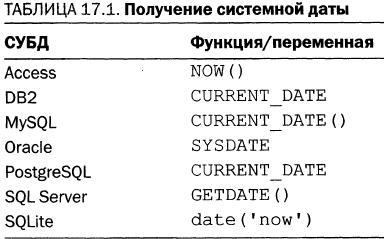

In [85]:
%sql SELECT date('now')

 * sqlite:///tysql/tysql.sqlite
Done.


date('now')
2022-06-13


# Обновление таблиц
Для того чтобы обновить определение таблицы, следует воспользоваться инструкцией ALTER TABLE.

In [86]:
# Поскольку добавление столбцов в таблицу — единственная операция, 
# поддерживаемая всеми СУБД, именно ее мы и рассмотрим в качестве примера.
# Посредством этой инструкции в таблицу Vendors добавляется столбец vend_phone. 
# Должен быть указан тип данных столбца.

%sql ALTER TABLE Vendors ADD vend_phone CHAR(20);\
SELECT * FROM Vendors

 * sqlite:///tysql/tysql.sqlite
Done.
Done.


vend_id,vend_name,vend_address,vend_city,vend_state,vend_zip,vend_country,vend_phone
BRS01,Bears R Us,123 Main Street,Bear Town,MI,44444,USA,None
BRE02,Bear Emporium,500 Park Street,Anytown,OH,44333,USA,None
DLL01,Doll House Inc.,555 High Street,Dollsville,CA,99999,USA,None
FRB01,Furball Inc.,1000 5th Avenue,New York,NY,11111,USA,None
FNG01,Fun and Games,42 Galaxy Road,London,None,N16 6PS,England,None
JTS01,Jouets et ours,1 Rue Amusement,Paris,None,45678,France,None


In [87]:
# Другие операции, такие как изменение или удаление столбцов, 
# задание ограничений или ключей, требуют похожего синтаксиса. 
# (Отметим, что следующий пример будет работать уже не во всех СУБД.)

%sql ALTER TABLE Vendors DROP COLUMN vend_phone;\
SELECT * FROM Vendors

 * sqlite:///tysql/tysql.sqlite
Done.
Done.


vend_id,vend_name,vend_address,vend_city,vend_state,vend_zip,vend_country
BRS01,Bears R Us,123 Main Street,Bear Town,MI,44444,USA
BRE02,Bear Emporium,500 Park Street,Anytown,OH,44333,USA
DLL01,Doll House Inc.,555 High Street,Dollsville,CA,99999,USA
FRB01,Furball Inc.,1000 5th Avenue,New York,NY,11111,USA
FNG01,Fun and Games,42 Galaxy Road,London,None,N16 6PS,England
JTS01,Jouets et ours,1 Rue Amusement,Paris,None,45678,France


ПРИМЕЧАНИЕ: инструкция ALTER TABLE в SQLite\
SQLite ограничивает перечень операций, которые можно выполнять \
с помощью инструкции alter table. Одно из наиболее важных \
ограничений заключается в том, что в этой СУБД нельзя применять \
данную инструкцию для изменения первичных и внешних ключей. \
Они должны указываться только в начальной ИНСТРУКЦИИ CREATE TABLE.

# Удаление таблиц

In [88]:
# Удаление таблиц (имеется в виду удаление самих таблиц, 
# а не их содержимого) — очень простой процесс. 
# Таблицы удаляются с помощью инструкции DROP TABLE.

%sql DROP TABLE Products2;

 * sqlite:///tysql/tysql.sqlite
Done.


[]

# Переименование таблиц

In [90]:
# Пользователи DB2, MariaDB, MySQL, Oracle и PostgreSQL могут 
# применять инструкцию RENAME. 
# Пользователям SQL Server доступна хранимая процедура sp_rename. 
# SQLite поддерживает переименование таблиц посредством инструкции ALTER TABLE.

%sql CREATE TABLE CustCopy AS SELECT * FROM Customers;\
ALTER TABLE CustCopy RENAME TO CustCopy2;

 * sqlite:///tysql/tysql.sqlite
Done.
Done.


[]

In [91]:
%sql SELECT * FROM sqlite_master WHERE type='table' AND name = 'CustCopy2'

 * sqlite:///tysql/tysql.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,CustCopy2,CustCopy2,15,"CREATE TABLE ""CustCopy2""( cust_id TEXT, cust_name TEXT, cust_address TEXT, cust_city TEXT, cust_state TEXT, cust_zip TEXT, cust_country TEXT, cust_contact TEXT, cust_email TEXT)"


# УРОК 18
Представления

## Зачем нужны представления
► Повторное использование инструкций SQL.\
► Упрощение сложных запросов. После того как запрос подготовлен, его можно с легкостью использовать повторно, и для этого не придется разбираться в нюансах его работы.\
► Вывод фрагментов таблицы вместо всей таблицы.\
► Защита данных. Пользователям можно предоставить доступ к определенному подмножеству таблиц, а не ко всем таблицам.\
► Изменение форматирования и способа отображения данных. Представления могут возвращать данные, отформатированные и отображаемые не так, как они хранятся в таблицах.

In [92]:
%sql CREATE VIEW ProductCustomers \
AS SELECT cust_name, cust_contact, prod_id \
FROM Customers, Orders, OrderItems \
WHERE Customers.cust_id = Orders.cust_id \
AND OrderItems.order_num = Orders.order_num;

 * sqlite:///tysql/tysql.sqlite
Done.


[]

In [93]:
%sql SELECT * FROM ProductCustomers order by prod_id

 * sqlite:///tysql/tysql.sqlite
Done.


cust_name,cust_contact,prod_id
Fun4All,Denise L. Stephens,BNBG01
The Toy Store,Sam Roberts,BNBG01
Village Toys,John Smith,BNBG01
Fun4All,Denise L. Stephens,BNBG02
The Toy Store,Sam Roberts,BNBG02
Village Toys,John Smith,BNBG02
Fun4All,Denise L. Stephens,BNBG03
The Toy Store,Sam Roberts,BNBG03
Village Toys,John Smith,BNBG03
Village Toys,John Smith,BR01


Для удаления представления предназначена инструкция drop view. Ее синтаксис прост:
DROP VIEW имя_представления;

%sql drop VIEW ProductCustomers

In [94]:
# Для получения списка клиентов, заказавших товар RGAN01, необходимо выполнить следующее.

%sql select cust_name, cust_contact\
from ProductCustomers WHERE prod_id = 'RGAN01';

 * sqlite:///tysql/tysql.sqlite
Done.


cust_name,cust_contact
Fun4All,Denise L. Stephens
The Toy Store,Sam Roberts


Вместо того чтобы выполнять конкатенацию всякий раз, когда в этом 
возникает необходимость, можно создать представление и 
использовать его вместо объединения

In [95]:
%sql CREATE VIEW VendorLocations AS\
SELECT RTRIM(vend_name) || ' (' || RTRIM(vend_country) || ') '\
AS vend_title FROM Vendors;

 * sqlite:///tysql/tysql.sqlite
Done.


[]

In [96]:
%sql SELECT * FROM VendorLocations;

 * sqlite:///tysql/tysql.sqlite
Done.


vend_title
Bears R Us (USA)
Bear Emporium (USA)
Doll House Inc. (USA)
Furball Inc. (USA)
Fun and Games (England)
Jouets et ours (France)


Например, вам может понадобиться определить представление CustomerEMailList таким образом, чтобы оно отфильтровывало клиентов, не имеющих адресов электронной почты.

In [97]:
%sql CREATE VIEW CustomerEMailList AS SELECT cust_id, cust_name, cust_email FROM Customers\
WHERE cust_email IS NOT NULL;

 * sqlite:///tysql/tysql.sqlite
Done.


[]

In [98]:
%sql SELECT * FROM CustomerEMailList;

 * sqlite:///tysql/tysql.sqlite
Done.


cust_id,cust_name,cust_email
1000000001,Village Toys,sales@villagetoys.com
1000000003,Fun4All,jjones@fun4all.com
1000000004,Fun4All,dstephens@fun4all.com


Представления чрезвычайно полезны для упрощения запросов с вычисляемыми полями.

In [99]:
# CREATE VIEW OrderltemsExpanded AS SELECT order_num, prod_id, quantity, item_price,
# quantity*item_price AS expanded_price FROM OrderIterns;

# УРОК 19
## Хранимые процедуры

Хранимые процедуры не поддерживаются в Access и SQLite. Таким образом, примеры данного урока не применимы в этих СУБД.
Поддержка хранимых процедур была добавлена в MySQL версии 5. В более ранних версиях СУБД примеры урока работать не будут.

Хранимые процедуры выполняются намного чаще, чем пишутся, поэтому мы начнем именно с их выполнения. Инструкция SQL для запуска хранимой процедуры — EXECUTE — принимает имя хранимой процедуры и передаваемые ей аргументы. Рассмотрим следующий пример.
Ввод ▼\
_________________________________\
EXECUTE AddNewProduct('JTS01',\
'Stuffed Eiffel Tower',\
6.49,\
'Plush stuffed toy with the text La Tour Eiffel in red white and blue')

# УРОК 20
## Обработка транзакций

На этом уроке вы узнаете, что такое транзакции и как применять инструкции COMMIT и ROLLBACK для их обработки.

► Транзакция. Единый набор SQL-запросов.\
► Откат. Процесс отмены указанных инструкций SQL.\
► Фиксация. Запись несохраненных инструкций SQL в таблицы базы данных.\
► Точка сохранения. Временное состояние в ходе выполнения транзакции, \
в которое можно вернуться после отмены части инструкций набора \
(в отличие от отмены всей транзакции).\

Ключ к управлению транзакциями заключается в том, чтобы сгруппировать SQL-запросы в логические блоки и явно указать, когда может быть выполнен откат, а когда — нет.

In [100]:
# %sql BEGIN TRANSACTION; \
# INSERT INTO Customers(cust_id, cust_name)\
# VALUES('1000000010', 'Toys Emporium');\
# SAVE TRANSACTION StartOrder;\
# INSERT INTO Orders(order_num, order_date, cust_id) \
# VALUES(20100,'2001/12/1','1000000010');\
# IF @@ERROR <> 0 ROLLBACK TRANSACTION StartOrder;\
# INSERT INTO OrderItems(order_num, order_item, prod_id,\
# quantity, item_price)\
# VALUES(20100, 1, 'BR01', 100, 5.49);\
# IF @@ERROR <> 0 ROLLBACK TRANSACTION StartOrder;\
# INSERT INTO OrderItems(order_num, order_item, prod_id,\
# quantity, item_price)\
# VALUES(20100, 2, 'BR03', 100, 10.99);\
# IF @@ERROR <> 0 ROLLBACK TRANSACTION StartOrder;\
# %sql COMMIT TRANSACTION

Здесь выполняется набор из четырех инструкций INSERT, обье- диненных в транзакцию. Точка сохранения определена после первой инструкции INSERT, так что если один из последующих запросов INSERT закончится неудачей, отмена транзакции произойдет лишь до этой точки. В SQL Server для контроля успешности запроса можно использовать системную переменную @@ ERROR. (В других СУБД применяются иные функции или переменные.) Если переменная 0@ ERROR содержит ненулевое значение, значит, произошла ошибка и транзакция отменяется до точки сохранения. Если транзакция в целом завершается успешно, для сохранения данных выполняется инструкция COMMIT.

In [106]:
%sql DELETE FROM Customers WHERE cust_id = '1000000010';\
DELETE FROM Orders WHERE order_num = '20100';\
DELETE FROM OrderItems WHERE order_num = '20100';\
SELECT * FROM Orders

 * sqlite:///tysql/tysql.sqlite
1 rows affected.
1 rows affected.
1 rows affected.
Done.


order_num,order_date,cust_id
20005,2012-05-01,1000000001
20006,2012-01-12,1000000003
20007,2012-01-30,1000000004
20008,2012-02-03,1000000005
20009,2012-02-08,1000000001


In [107]:
con.execute("BEGIN TRANSACTION;")
try:
    con.execute("INSERT INTO Customers(cust_id, cust_name) \
    VALUES('1000000010', 'Toys Emporium');")
    con.execute("SAVEPOINT StartOrder;")
    con.execute("INSERT INTO Orders(order_num, order_date, cust_id) \
    VALUES(20100,'2001/12/1','1000000010');")
    con.execute("COMMIT TRANSACTION")
except con.Error:
    print("failed!")
    con.execute("rollback")

In [108]:
query2 = """SELECT * FROM Customers;"""
cursor = con.execute(query2)
cursor.fetchall()

[('1000000001',
  'Village Toys',
  '200 Maple Lane',
  'Detroit',
  'MI',
  '44444',
  'USA',
  'John Smith',
  'sales@villagetoys.com'),
 ('1000000002',
  'Kids Place',
  '333 South Lake Drive',
  'Columbus',
  'OH',
  '43333',
  'USA',
  'Michelle Green',
  None),
 ('1000000003',
  'Fun4All',
  '1 Sunny Place',
  'Muncie',
  'IN',
  '42222',
  'USA',
  'Jim Jones',
  'jjones@fun4all.com'),
 ('1000000004',
  'Fun4All',
  '829 Riverside Drive',
  'Phoenix',
  'AZ',
  '88888',
  'USA',
  'Denise L. Stephens',
  'dstephens@fun4all.com'),
 ('1000000005',
  'The Toy Store',
  '4545 53rd Street',
  'Chicago',
  'IL',
  '54545',
  'USA',
  'Sam Roberts',
  None),
 ('1000000010', 'Toys Emporium', None, None, None, None, None, None, None)]

# УРОК 21
## Курсоры

иногда бывает необходимо просмотреть строки в прямом или обратном порядке по одной или по нескольку строк за раз. Именно для этого и нужны курсоры. Курсор представляет собой запрос к базе данных, хранящийся на сервере СУБД, — это не инструкция SELECT, но результирующий набор, выборка, полученная в результате выполнения инструкции SELECT. После того как курсор сохранен, приложения могут “прокручивать” (просматривать) строки в прямом или обратном порядке, когда возникает такая необходимость.

In [109]:
# Приведенная ниже версия подходит для DB2, MariaDB, MySQL и SQL Server.
# Ввод ▼
# ___________
# DECLARE CustCursor CURSOR FOR
# SELECT * FROM Customers WHERE oust email IS NULL

# версия для Oracle и PostgreSQL.
# DECLARE CURSOR CustCursor IS
# SELECT * FROM Customers WHERE oust email IS NULL

# Курсоры открываются с помощью инструкции OPEN CURSOR, синтаксис 
# которой настолько прост, что его поддерживает большинство СУБД.
# OPEN CURSOR CustCursor

# Доступ к содержимому курсора можно получить с помощью инструкции FETCH
# DECLARE TYPE CustCursor IS REF CURSOR RETURN Customers%ROWTYPE;
# DECLARE CustRecord Customers%ROWTYPE BEGIN
# OPEN CustCursor;
# LOOP
# FETCH CustCursor INTO CustRecord;
# EXIT WHEN CustCursor%NOTFOUND;
# END LOOP;
# CLOSE CustCursor;
# END;

# CLOSE CustCursor

# CLOSE CustCursor DEALLOCATE CURSOR CustCursor

# УРОК 22
Расширенные возможности SQL

На этом уроке мы рассмотрим несколько расширенных средств обработки данных в SQL: ограничения, индексы и триггеры.

СУБД принудительно обеспечивает ссылочную целостность за счет ограничений, налагаемых на таблицы базы данных. Большинство ограничений задается в определениях таблиц (с помощью инструкций CREATE TABLE или ALTER TABLE; СМ. урок 17).

# Первичные ключи
Один из способов определить первичный ключ — указать соответствующее ограничение в процессе создания таблицы.

In [110]:
%sql CREATE TABLE Vendors2\
(vend_id CHAR(10) NOT NULL PRIMARY KEY, \
vend_name CHAR(50) NOT NULL,\
vend_address CHAR(50) NULL,\
vend_city CHAR(50) NULL,\
vend_state CHAR(5) NULL,\
vend_zip CHAR(10) NULL,\
vend_country CHAR(50) NULL);

 * sqlite:///tysql/tysql.sqlite
Done.


[]

In [111]:
%sql ALTER TABLE Vendors ADD CONSTRAINT PRIMARY KEY * (vend_id);

 * sqlite:///tysql/tysql.sqlite
(sqlite3.OperationalError) near "CONSTRAINT": syntax error
[SQL: ALTER TABLE Vendors ADD CONSTRAINT PRIMARY KEY * (vend_id);]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


ПРИМЕЧАНИЕ: ключи в SQLite
В SQLite нельзя определять ключи с помощью инструкции ALTER TABLE. Это можно делать только в первоначальной инструкции
CREATE TABLE.

Вот один из способов определения внешнего ключа.

In [112]:
%sql CREATE TABLE Orders2 \
(order_num INTEGER NOT NULL PRIMARY KEY,\
order_date DATETIME NOT NULL,\
cust_id CHAR(10) NOT NULL REFERENCES Customers(cust_id));

 * sqlite:///tysql/tysql.sqlite
Done.


[]

Аналогичного результата можно добиться с помощью ключевого слова CONSTRAINT в инструкции ALTER TABLE.

ALTER TABLE Orders ADD CONSTRAINT FOREIGN KEY (cust_id) REFERENCES Customers(cust_id)

В следующем примере налагается ограничение на значения столбца quantity таблицы Orderltems, с тем чтобы для всех товаров указывалось количество, большее 0.

In [113]:
%sql CREATE TABLE OrderItems2 (order_num INTEGER NOT NULL,\
order_item INTEGER NOT NULL,\
prod_id CHAR(10) NOT NULL,\
quantity INTEGER NOT NULL CHECK (quantity > 0),\
item_price MONEY NOT NULL)

 * sqlite:///tysql/tysql.sqlite
Done.


[]

In [114]:
%sql SELECT * FROM sqlite_master WHERE type='table' AND name like 'OrderItems%'

 * sqlite:///tysql/tysql.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,OrderItems,OrderItems,4,"CREATE TABLE OrderItems( order_num int NOT NULL , order_item int NOT NULL , prod_id char(10) NOT NULL , quantity int NOT NULL , item_price decimal(8,2) NOT NULL , PRIMARY KEY (order_num, order_item) , FOREIGN KEY (order_num) REFERENCES Orders (order_num) , FOREIGN KEY (prod_id) REFERENCES Products (prod_id))"
table,OrderItems2,OrderItems2,20,"CREATE TABLE OrderItems2 (order_num INTEGER NOT NULL, order_item INTEGER NOT NULL, prod_id CHAR(10) NOT NULL, quantity INTEGER NOT NULL CHECK (quantity > 0), item_price MONEY NOT NULL)"


In [115]:
%sql INSERT INTO OrderItems2(\
order_num,\
order_item,\
prod_id,\
quantity,\
item_price)\
VALUES(\
'2005',\
2,\
'BR01',\
10,\
20);

 * sqlite:///tysql/tysql.sqlite
1 rows affected.


[]

In [116]:
%sql SELECT * FROM OrderItems2

 * sqlite:///tysql/tysql.sqlite
Done.


order_num,order_item,prod_id,quantity,item_price
2005,2,BR01,10,20


In [117]:
# %sql INSERT INTO OrderItems2(\
# order_num,\
# order_item,\
# prod_id,\
# quantity,\
# item_price)\
# VALUES(\
# '2005',\
# 2,\
# 'BR01',\
# 0,\ #со значением 0 работать не будет: quantity INTEGER NOT NULL CHECK (quantity > 0)
# 22.3);

Дабы проконтролировать тот факт, что в столбце с обозначением пола может содержаться только буква М или F, добавьте следующую строку в инструкцию ALTER TABLE.\
ADD CONSTRAINT CHECK (gender LIKE '[MF]')

# Что такое индексы

Индексы предназначены для логической сортировки хранимых данных, что позволяет повысить скорость поиска и сортировки строк в запросах. 

In [118]:
%sql SELECT * FROM Products

 * sqlite:///tysql/tysql.sqlite
Done.


prod_id,vend_id,prod_name,prod_price,prod_desc
BR01,BRS01,8 inch teddy bear,5.99,"8 inch teddy bear, comes with cap and jacket"
BR02,BRS01,12 inch teddy bear,8.99,"12 inch teddy bear, comes with cap and jacket"
BR03,BRS01,18 inch teddy bear,11.99,"18 inch teddy bear, comes with cap and jacket"
BNBG01,DLL01,Fish bean bag toy,3.49,"Fish bean bag toy, complete with bean bag worms with which to feed it"
BNBG02,DLL01,Bird bean bag toy,3.49,"Bird bean bag toy, eggs are not included"
BNBG03,DLL01,Rabbit bean bag toy,3.49,"Rabbit bean bag toy, comes with bean bag carrots"
RGAN01,DLL01,Raggedy Ann,4.99,18 inch Raggedy Ann doll
RYL01,FNG01,King doll,9.49,12 inch king doll with royal garments and crown
RYL02,FNG01,Queen doll,9.49,12 inch queen doll with royal garments and crown


In [119]:
%sql CREATE INDEX prod_name_ind ON Products (prod_name);\
SELECT * FROM Products

 * sqlite:///tysql/tysql.sqlite
Done.
Done.


prod_id,vend_id,prod_name,prod_price,prod_desc
BR01,BRS01,8 inch teddy bear,5.99,"8 inch teddy bear, comes with cap and jacket"
BR02,BRS01,12 inch teddy bear,8.99,"12 inch teddy bear, comes with cap and jacket"
BR03,BRS01,18 inch teddy bear,11.99,"18 inch teddy bear, comes with cap and jacket"
BNBG01,DLL01,Fish bean bag toy,3.49,"Fish bean bag toy, complete with bean bag worms with which to feed it"
BNBG02,DLL01,Bird bean bag toy,3.49,"Bird bean bag toy, eggs are not included"
BNBG03,DLL01,Rabbit bean bag toy,3.49,"Rabbit bean bag toy, comes with bean bag carrots"
RGAN01,DLL01,Raggedy Ann,4.99,18 inch Raggedy Ann doll
RYL01,FNG01,King doll,9.49,12 inch king doll with royal garments and crown
RYL02,FNG01,Queen doll,9.49,12 inch queen doll with royal garments and crown


# Что такое триггеры

Триггеры — это особые хранимые процедуры, автоматически выполняемые при наступлении определенных событий в базе данных. Триггеры могут быть связаны с выполнением инструкций INSERT, UPDATE и DELETE по отношению к указанным таблицам.

Чаще всего триггеры применяются для следующих целей:\
► обеспечение непротиворечивости данных (например, для преобразования всех названий штатов в верхний регистр при выполнении инструкций INSERT или UPDATE);\
► выполнение действий по отношению к другим таблицам на основе изменений, которые были сделаны в какой-то таблице (например, для внесения записи в контрольный журнал с целью регистрации каждого случая обновления или удаления строки);\
► дополнительная проверка и, в случае необходимости, отмена ввода данных (например, дабы удостовериться в том, что разрешенная для клиента сумма кредита не превышена, в противном случае операция блокируется);\
► подсчет значений вычисляемых полей или обновление меток даты/времени.

# Безопасность баз данных

Чаще всего применяются следующие ограничения безопасности:\
► ограничение доступа к административным функциям (создание таблиц, изменение или удаление существующих таблиц и т.п.);\
► ограничение доступа к отдельным базам данных или таблицам;\
► ограничение типа доступа (только для чтения, доступ к отдельным столбцам и т.п.);\
► организация доступа к таблицам только через представления или хранимые процедуры;\
► создание нескольких уровней безопасности, вследствие чего обеспечивается различная степень доступа и контроля на основе учетных записей пользователей.\
► ограничение возможности управлять учетными записями пользователей.

Управление безопасностью осуществляется посредством инструкций GRANT и REVOKE, хотя большинство СУБД предлагает интерактивные утилиты администрирования, в которых применяются те же самые инструкции.